# Gradient Descent

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

## Dataset

In [4]:
sns.set_style('darkgrid')
np.random.seed(seed=1) 

x = np.random.uniform(0, 1, 12) 

def f(x):              #  y 
    return 2*x + 0     #  2x or 3x

noise = 0.15 
noise = np.random.randn(x.shape[0]) * noise

y = f(x) + noise  

In [5]:
x.shape , y.shape

((12,), (12,))

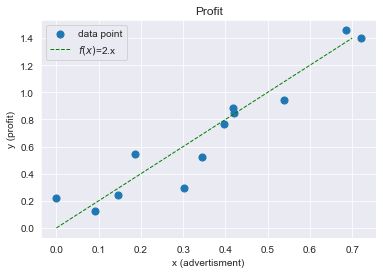

In [6]:
plt.scatter(x, y, marker='o', s=50, label='data point')

plt.plot([0, .7], [f(0),1.4], 'g--', lw=1, label='$f(x)$=2.x')
plt.xlabel('x (advertisment)')
plt.ylabel('y (profit)')

plt.title('Profit')
plt.legend(loc=2)
plt.show()

## Neuron and Cost function (MSE)

In [7]:
# 1 Neuron
def neuron(x, w):
    return w*x + 0

In [8]:
def loss_mse(y_pred, y_true):
    return np.mean((y_true - y_pred)**2)

[0.         0.08163265 0.16326531 0.24489796 0.32653061 0.40816327
 0.48979592 0.57142857 0.65306122 0.73469388 0.81632653 0.89795918
 0.97959184 1.06122449 1.14285714 1.2244898  1.30612245 1.3877551
 1.46938776 1.55102041 1.63265306 1.71428571 1.79591837 1.87755102
 1.95918367 2.04081633 2.12244898 2.20408163 2.28571429 2.36734694
 2.44897959 2.53061224 2.6122449  2.69387755 2.7755102  2.85714286
 2.93877551 3.02040816 3.10204082 3.18367347 3.26530612 3.34693878
 3.42857143 3.51020408 3.59183673 3.67346939 3.75510204 3.83673469
 3.91836735 4.        ]


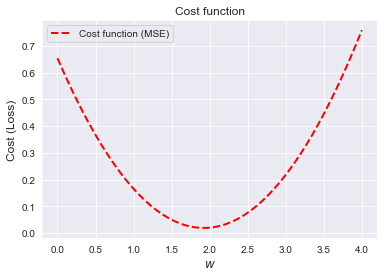

In [9]:
ws = np.linspace(0, 4, num=50) 
print(ws)

loss_ws = [loss_mse(neuron(x,w), y) for w in ws]

plt.plot(ws, loss_ws, 'r--', lw=2, label='Cost function (MSE)')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Cost function')
plt.legend()
plt.show()

## Gradient and Train

In [10]:
np.random.rand() * 4

2.7675084558018934

In [36]:
def gradient(w, x, y_true):
    y_pred = neuron(x, w)
    return 2 * x * (y_pred - y_true) # use this

def delta_w(w_k, x, y, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, y))

# w = np.random.rand() * 4  
w = .08                # .08, 3.7 initial weight
learning_rate = 0.9       # 0.9  # 4.9      # Alpha 

no_of_iterations = 9 # 3   # epochs

history_loss = [(w, loss_mse(neuron(x, w), y))] 
for i in range(no_of_iterations):
    dw = delta_w(w, x, y, learning_rate)  
    w = w - dw  
    history_loss.append((w, loss_mse(neuron(x, w), y)))  

for i in range(0, len(history_loss)):
    print('{} -> w: {:.2f} \t loss: {} '.format(i, history_loss[i][0], history_loss[i][1]))

0 -> w: 0.08 	 loss: 0.6026350889130302 
1 -> w: 0.65 	 loss: 0.2972873040173511 
2 -> w: 1.04 	 loss: 0.15157473984131506 
3 -> w: 1.32 	 loss: 0.08204041731132092 
4 -> w: 1.50 	 loss: 0.04885850168828629 
5 -> w: 1.63 	 loss: 0.0330240262184311 
6 -> w: 1.72 	 loss: 0.025467783346443618 
7 -> w: 1.79 	 loss: 0.02186192936983673 
8 -> w: 1.83 	 loss: 0.02014120875234395 
9 -> w: 1.86 	 loss: 0.019320077485611143 


## Plot steps

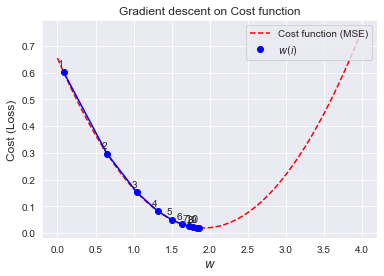

In [37]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)') 

for i in range(0, len(history_loss)-1):
    w1, c1 = history_loss[i]
    w2, c2 = history_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.02, f'{i+1}', ha='right')

plt.plot(w2, c2, 'bo', label='$w(i)$')
plt.text(w2, c2+0.02, f'${i+2}$', ha='right')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')

plt.legend(loc=1)
plt.show()

## Loss Curve

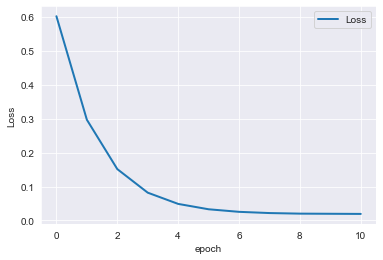

In [38]:
epoch = np.linspace(0, len(history_loss), num=len(history_loss)).astype('int')
step_loss = [ls[1] for ls in history_loss]

plt.plot(epoch, step_loss, lw=2, label='Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Sklearn

In [16]:
# use Sklearn

from sklearn import linear_model
lm = linear_model.LinearRegression()
X = x.reshape(-1, 1)

lm.fit(X, y)

print(lm.coef_, lm.intercept_)  # w and b

[1.87331728] 0.02454657084406986


# จำนวนรอบในการ Train (Epochs)
ตั้งค่าจำนวนรอบในการ Train
- เช่น 3, 9, 22

In [ ]:
no_of_iterations = 3   # epochs

# อัตราความเร็วในการเรียนรู้ (Learning Rate: Alpha)
- เช่น Learning rate 0.9, 0.1, 2, 4.9 (try epochs=3)

In [ ]:
learning_rate = 2.0      # Alpha (Learning Rate)

# เริ่มต้น Weight ที่ค่าใด ๆ (Initial Weight)

In [ ]:
w = np.random.rand() * 4  
# w = 0.08                # initial weight

# ลองเปลี่ยน Dataset 
ให้มีค่า w เป็นค่าอื่น เช่น w=3  สำหรับ y=3x

In [ ]:
def f(x):              #  y 
    return 3*x + 0     #  2x or 3x